In [20]:
import numpy as np
import datetime
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import wrds

In [21]:
df=pd.read_csv('data.csv',sep=';')
df['date'] = pd.to_datetime(df['date'])
df.head()

,permno,date,Rn,shrout,prc,mcap,mcap_l,rf,Rm,const,Rn_e,Rm_e
0,10001,2010-06-30,-0.043421,6080.0,10.8600,66028.8000,NaN,0.000135,-0.050780,1,-0.043556,-0.050915
1,10001,2010-05-28,0.004829,6071.0,11.4000,69209.4000,66028.80,0.000114,-0.079240,1,0.004715,-0.079354
2,10001,2010-04-30,0.124385,6070.0,11.3900,69137.3000,69209.40,0.000118,0.020036,1,0.124267,0.019918
3,10001,2010-03-31,0.020643,4361.0,10.1700,44351.3700,69137.30,0.000112,0.063668,1,0.020531,0.063556
4,10001,2010-02-26,-0.000656,4361.0,10.0084,43646.6324,44351.37,0.000061,0.034744,1,-0.000717,0.034683


**MOMENTUM**

In [22]:
#Cumulative 12 month past return for each stock:
df=df.sort_values(['permno','date']).reset_index(drop=True)
df['LN_Cret12'] = df.groupby('permno').apply(lambda x: np.log(x.Rn+1).rolling(11,closed='left').sum()).values
df['Rn_f'] = df.groupby(['permno'])['Rn'].shift(-1)
df.head(13)

C:\Users\Yass La Menace\AppData\Local\Temp\ipykernel_30668\2294971662.py:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df['LN_Cret12'] = df.groupby('permno').apply(lambda x: np.log(x.Rn+1).rolling(11,closed='left').sum()).values


,permno,date,Rn,shrout,prc,mcap,mcap_l,rf,Rm,const,Rn_e,Rm_e,LN_Cret12,Rn_f
0,10001,2009-12-31,0.162621,4361.0,10.3000,44918.3000,43871.6600,0.000032,0.028475,1,0.162589,0.028443,NaN,-0.018932
1,10001,2010-01-29,-0.018932,4361.0,10.0600,43871.6600,43646.6324,0.000013,-0.037172,1,-0.018945,-0.037185,NaN,-0.000656
2,10001,2010-02-26,-0.000656,4361.0,10.0084,43646.6324,44351.3700,0.000061,0.034744,1,-0.000717,0.034683,NaN,0.020643
3,10001,2010-03-31,0.020643,4361.0,10.1700,44351.3700,69137.3000,0.000112,0.063668,1,0.020531,0.063556,NaN,0.124385
4,10001,2010-04-30,0.124385,6070.0,11.3900,69137.3000,69209.4000,0.000118,0.020036,1,0.124267,0.019918,NaN,0.004829
5,10001,2010-05-28,0.004829,6071.0,11.4000,69209.4000,66028.8000,0.000114,-0.079240,1,0.004715,-0.079354,NaN,-0.043421
6,10001,2010-06-30,-0.043421,6080.0,10.8600,66028.8000,NaN,0.000135,-0.050780,1,-0.043556,-0.050915,NaN,0.083333
7,10001,2010-07-30,0.083333,6080.0,11.7200,71257.6000,62983.0830,0.000118,0.070360,1,0.083215,0.070242,NaN,-0.111263
8,10001,2010-08-31,-0.111263,6073.0,10.3710,62983.0830,67531.7600,0.000127,-0.042864,1,-0.111390,-0.042991,NaN,0.076560
9,10001,2010-09-30,0.076560,6073.0,11.1200,67531.7600,69485.9526,0.000112,0.091628,1,0.076448,0.091516,NaN,0.032815


In [23]:
#Momentum decile weights
q = 10
#Momentum is the decile
df['Momentum'] = df.groupby('date')['LN_Cret12'].transform(lambda x: pd.qcut(x,q,labels=False, duplicates='drop'))
df['w_L'] = (df['Momentum']==q-1)*df['mcap']
df['w_S'] = (df['Momentum']==0)*df['mcap']
#Normalize the weights
df['w_L'] = df['w_L']/df.groupby(['date'])['w_L'].transform('sum')
df['w_S'] = df['w_S']/df.groupby(['date'])['w_S'].transform('sum')
df['w_Mom'] = df['w_L'] - df['w_S']
Momentum = df.groupby('date').apply(lambda x: np.sum(x['Rn_f']*x['w_Mom'])).reset_index()
Momentum['date'] =  Momentum['date'] + pd.DateOffset(months=1)
Momentum.columns = ['date','Mom_ret']

C:\Users\Yass La Menace\AppData\Local\Temp\ipykernel_30668\1208739355.py:11: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  Momentum = df.groupby('date').apply(lambda x: np.sum(x['Rn_f']*x['w_Mom'])).reset_index()


In [24]:
#Generate deciles
df_momentum=df.dropna(subset=['Momentum']).copy()
df_momentum['momentum_deciles']=df_momentum.groupby('date')['Momentum'].transform(lambda x :  pd.qcut(x, 10,labels=False, duplicates='drop'))

#Equal-Weighted pfs
ret_ew = df_momentum.groupby(['date','momentum_deciles'])['Rn'].mean().reset_index()
ew_ret_mean = ret_ew.groupby('momentum_deciles')['Rn'].mean()*12
ew_ret_std = ret_ew.groupby('momentum_deciles')['Rn'].std()*(np.sqrt(12))
ew_rf_mean=df_momentum.groupby('momentum_deciles')['rf'].mean()*12
ew_sr=(ew_ret_mean-ew_rf_mean)/(ew_ret_std)



# Value-weighed pfs
df_momentum['vw_Q']=df_momentum['mcap']/(df_momentum.groupby(['date','momentum_deciles'])['mcap'].transform('sum'))
df_momentum['ret_vw'] = df_momentum['vw_Q']*df_momentum['Rn']
ret_vw = df_momentum.groupby(['date','momentum_deciles'])['ret_vw'].sum().reset_index()
vw_ret_mean = ret_vw.groupby('momentum_deciles')['ret_vw'].mean()*12
vw_ret_std = ret_vw.groupby('momentum_deciles')['ret_vw'].std()*(np.sqrt(12))
vw_rf_mean=df_momentum.groupby('momentum_deciles')['rf'].mean()*12
vw_sr=(vw_ret_mean-ew_rf_mean)/(vw_ret_std)

In [25]:
#Constuct dataframes for efficient plotting 
deciles=['Q'+ str(x) for x in np.arange(1,11)]
means=np.concatenate((vw_ret_mean.values,ew_ret_mean.values))
means_df=pd.DataFrame(zip(means,['VW']*len(vw_ret_mean.values)+['EW']*len(ew_ret_mean.values),deciles+deciles),columns=['values','type','quantile'])
stds=np.concatenate((vw_ret_std.values,ew_ret_std.values))
stds_df=pd.DataFrame(zip(stds,['VW']*len(vw_ret_mean.values)+['EW']*len(ew_ret_mean.values),deciles+deciles),columns=['values','type','quantile'])
srs=np.concatenate((vw_sr.values,ew_sr.values))
srs_df=pd.DataFrame(zip(srs,['VW']*len(vw_sr.values)+['EW']*len(ew_sr.values),deciles+deciles),columns=['values','type','quantile'])

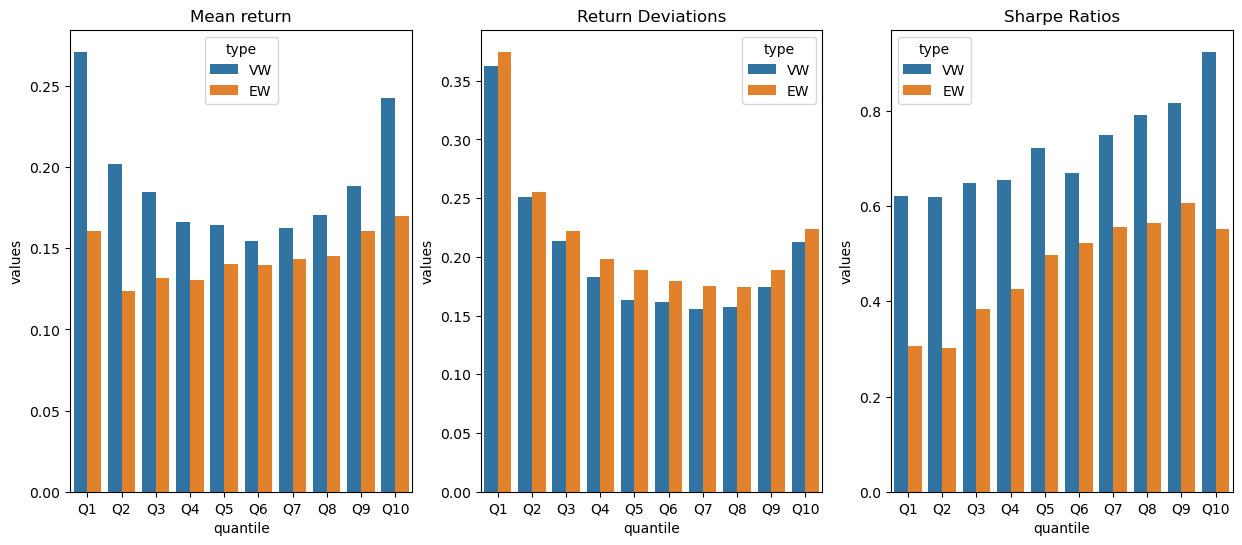

In [26]:
import seaborn as sns
# 5. Plot Means Histogram
fig, axs= plt.subplots(1,3,figsize=(15,6))
sns.barplot(means_df,x='quantile',y='values',hue='type',ax=axs[0])
sns.barplot(stds_df,x='quantile',y='values',hue='type',ax=axs[1])
sns.barplot(srs_df,x='quantile',y='values',hue='type',ax=axs[2])

axs[0].set_title('Mean return')
axs[1].set_title('Return Deviations')
axs[2].set_title('Sharpe Ratios')
plt.show()

## B)

In [31]:
# Long leg (deciles 7 to 9)
ew_long_leg = df_momentum[df_momentum['momentum_deciles'] > 6].groupby('date')['Rn'].mean().reset_index()
ew_long_leg.columns = ['date', 'ew_long_leg']

# Short leg (deciles 0 to 2)
ew_short_leg = df_momentum[df_momentum['momentum_deciles'] < 3].groupby('date')['Rn'].mean().reset_index()
ew_short_leg.columns = ['date', 'ew_short_leg']

# Merge long and short legs
ew_legs = pd.merge(ew_long_leg, ew_short_leg, on='date')
ew_legs['ew_strategy'] = ew_legs['ew_long_leg'] - ew_legs['ew_short_leg']

# Compute statistics
ew_means = ew_legs[['ew_long_leg', 'ew_short_leg', 'ew_strategy']].mean() * 12
ew_stds = ew_legs[['ew_long_leg', 'ew_short_leg', 'ew_strategy']].std() * np.sqrt(12)
ew_sharpe_ratios = ew_means / ew_stds

print("Equal-Weighted Portfolios Statistics")
print("Means (Annualized):", ew_means)
print("Standard Deviations (Annualized):", ew_stds)
print("Sharpe Ratios:", ew_sharpe_ratios)

Equal-Weighted Portfolios Statistics
Means (Annualized): ew_long_leg     0.162958
ew_short_leg    0.139045
ew_strategy     0.023913
dtype: float64
Standard Deviations (Annualized): ew_long_leg     0.190562
ew_short_leg    0.277025
ew_strategy     0.183749
dtype: float64
Sharpe Ratios: ew_long_leg     0.855148
ew_short_leg    0.501924
ew_strategy     0.130140
dtype: float64


In [32]:
# Long leg (deciles 7 to 9)
vw_long_leg = df_momentum[df_momentum['momentum_deciles'] > 6].groupby('date').apply(lambda x: np.sum(x['Rn'] * x['vw_Q'])).reset_index()
vw_long_leg.columns = ['date', 'vw_long_leg']

# Short leg (deciles 0 to 2)
vw_short_leg = df_momentum[df_momentum['momentum_deciles'] < 3].groupby('date').apply(lambda x: np.sum(x['Rn'] * x['vw_Q'])).reset_index()
vw_short_leg.columns = ['date', 'vw_short_leg']

# Merge long and short legs
vw_legs = pd.merge(vw_long_leg, vw_short_leg, on='date')
vw_legs['vw_strategy'] = vw_legs['vw_long_leg'] - vw_legs['vw_short_leg']

# Compute statistics
vw_means = vw_legs[['vw_long_leg', 'vw_short_leg', 'vw_strategy']].mean() * 12
vw_stds = vw_legs[['vw_long_leg', 'vw_short_leg', 'vw_strategy']].std() * np.sqrt(12)
vw_sharpe_ratios = vw_means / vw_stds

print("Value-Weighted Portfolios Statistics")
print("Means (Annualized):", vw_means)
print("Standard Deviations (Annualized):", vw_stds)
print("Sharpe Ratios:", vw_sharpe_ratios)


C:\Users\Yass La Menace\AppData\Local\Temp\ipykernel_30668\1898691597.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  vw_long_leg = df_momentum[df_momentum['momentum_deciles'] > 6].groupby('date').apply(lambda x: np.sum(x['Rn'] * x['vw_Q'])).reset_index()


Value-Weighted Portfolios Statistics
Means (Annualized): vw_long_leg     0.579765
vw_short_leg    0.657504
vw_strategy    -0.077738
dtype: float64
Standard Deviations (Annualized): vw_long_leg     0.495102
vw_short_leg    0.789282
vw_strategy     0.649110
dtype: float64
Sharpe Ratios: vw_long_leg     1.171003
vw_short_leg    0.833040
vw_strategy    -0.119761
dtype: float64


C:\Users\Yass La Menace\AppData\Local\Temp\ipykernel_30668\1898691597.py:6: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  vw_short_leg = df_momentum[df_momentum['momentum_deciles'] < 3].groupby('date').apply(lambda x: np.sum(x['Rn'] * x['vw_Q'])).reset_index()


In [33]:
from scipy import stats

ew_ttest = stats.ttest_1samp(ew_legs['ew_strategy'], 0)
print("Equal-Weighted Portfolio Strategy T-Test:", ew_ttest)

vw_ttest = stats.ttest_1samp(vw_legs['vw_strategy'], 0)
print("Value-Weighted Portfolio Strategy T-Test:", vw_ttest)


Equal-Weighted Portfolio Strategy T-Test: TtestResult(statistic=1.0003309901934605, pvalue=0.3174921133855464, df=708)
Value-Weighted Portfolio Strategy T-Test: TtestResult(statistic=-0.9205533991986716, pvalue=0.3575971881300668, df=708)


Both the equal-weighted and value-weighted portfolio strategies do not show statistically significant average returns based on the T-tests conducted. The p-values for both tests are greater than the common significance level of 0.05, indicating that the average returns of these strategies are not significantly different from zero. Therefore, we cannot conclude that these momentum strategies provide significant excess returns over the period analyzed.

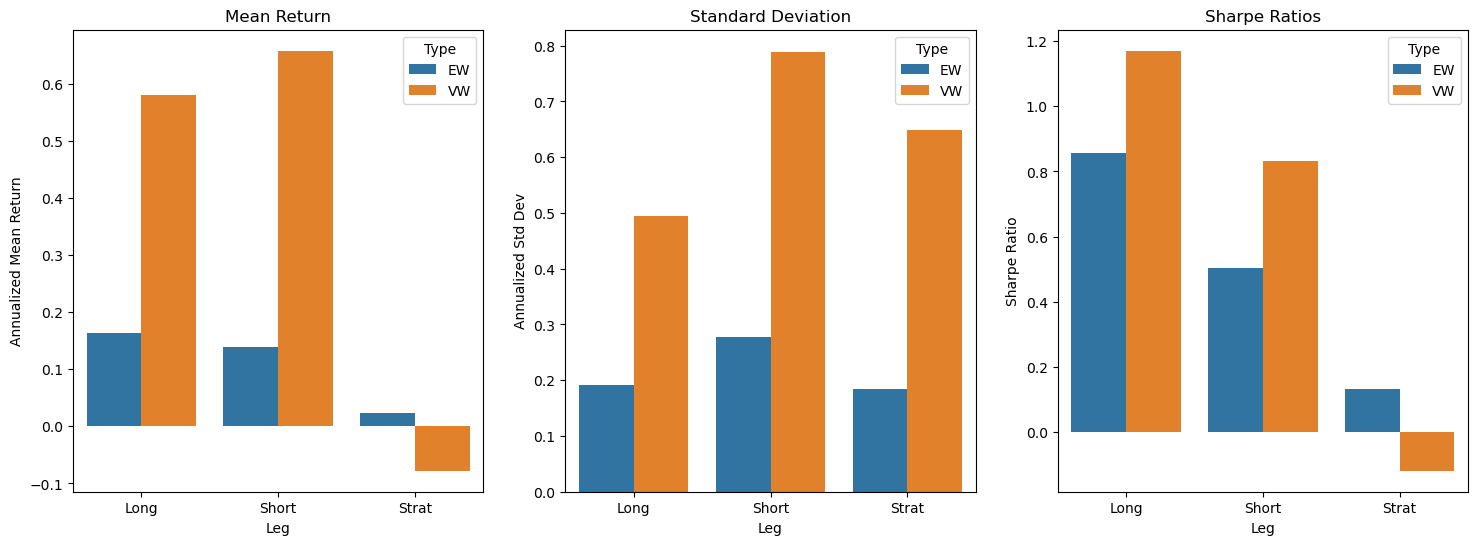

In [34]:
# Prepare data for plotting
ew_means_df = pd.DataFrame(ew_means).reset_index()
ew_means_df.columns = ['Leg', 'Annualized Mean Return']
ew_means_df['Type'] = 'EW'

ew_stds_df = pd.DataFrame(ew_stds).reset_index()
ew_stds_df.columns = ['Leg', 'Annualized Std Dev']
ew_stds_df['Type'] = 'EW'

ew_sharpe_ratios_df = pd.DataFrame(ew_sharpe_ratios).reset_index()
ew_sharpe_ratios_df.columns = ['Leg', 'Sharpe Ratio']
ew_sharpe_ratios_df['Type'] = 'EW'

vw_means_df = pd.DataFrame(vw_means).reset_index()
vw_means_df.columns = ['Leg', 'Annualized Mean Return']
vw_means_df['Type'] = 'VW'

vw_stds_df = pd.DataFrame(vw_stds).reset_index()
vw_stds_df.columns = ['Leg', 'Annualized Std Dev']
vw_stds_df['Type'] = 'VW'

vw_sharpe_ratios_df = pd.DataFrame(vw_sharpe_ratios).reset_index()
vw_sharpe_ratios_df.columns = ['Leg', 'Sharpe Ratio']
vw_sharpe_ratios_df['Type'] = 'VW'

combined_means_df = pd.concat([ew_means_df, vw_means_df])
combined_stds_df = pd.concat([ew_stds_df, vw_stds_df])
combined_sharpe_ratios_df = pd.concat([ew_sharpe_ratios_df, vw_sharpe_ratios_df])

# Update the names for clarity
ew_means_df['Leg'] = ew_means_df['Leg'].replace({'ew_long_leg': 'Long', 'ew_short_leg': 'Short', 'ew_strategy': 'Strat'})
ew_stds_df['Leg'] = ew_stds_df['Leg'].replace({'ew_long_leg': 'Long', 'ew_short_leg': 'Short', 'ew_strategy': 'Strat'})
ew_sharpe_ratios_df['Leg'] = ew_sharpe_ratios_df['Leg'].replace({'ew_long_leg': 'Long', 'ew_short_leg': 'Short', 'ew_strategy': 'Strat'})

vw_means_df['Leg'] = vw_means_df['Leg'].replace({'vw_long_leg': 'Long', 'vw_short_leg': 'Short', 'vw_strategy': 'Strat'})
vw_stds_df['Leg'] = vw_stds_df['Leg'].replace({'vw_long_leg': 'Long', 'vw_short_leg': 'Short', 'vw_strategy': 'Strat'})
vw_sharpe_ratios_df['Leg'] = vw_sharpe_ratios_df['Leg'].replace({'vw_long_leg': 'Long', 'vw_short_leg': 'Short', 'vw_strategy': 'Strat'})


combined_means_df = pd.concat([ew_means_df, vw_means_df])
combined_stds_df = pd.concat([ew_stds_df, vw_stds_df])
combined_sharpe_ratios_df = pd.concat([ew_sharpe_ratios_df, vw_sharpe_ratios_df])

# Plot combined statistics
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

sns.barplot(x='Leg', y='Annualized Mean Return', hue='Type', data=combined_means_df, ax=axs[0])
sns.barplot(x='Leg', y='Annualized Std Dev', hue='Type', data=combined_stds_df, ax=axs[1])
sns.barplot(x='Leg', y='Sharpe Ratio', hue='Type', data=combined_sharpe_ratios_df, ax=axs[2])

axs[0].set_title('Mean Return')
axs[1].set_title('Standard Deviation')
axs[2].set_title('Sharpe Ratios')

plt.show()

